In [1]:
import os
import re
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
raw_data_path = os.path.join('/home/prashanth/DS/NLP/article-generator/data/raw/Hindu_articles.csv')

In [3]:
raw_data = pd.read_csv(raw_data_path)

In [4]:
raw_data.head()

,Title,Article
0,Passenger vehicles wholesales rise 26.73% to r...,Domestic passenger vehicle wholesales grew 26....
1,Lamborghini unveils Urus S at starting price o...,"Automobili Lamborghini has unveiled Urus S, th..."
2,Rupee trade arrangement to help cut transactio...,International trade in the domestic currency w...
3,"G-20 Finance Ministers discuss debt distress, ...",G-20 countries discussed the debt distress of ...
4,"Goods exports grew 6% , imports 16.5% this fiscal",India’s goods exports declined for the second ...


In [5]:
# Basic analysis of articles
num_articles = len(raw_data)
avg_article_length = raw_data['Article'].apply(lambda x: len(str(x).split()) if pd.notna(x) else 0).mean()
max_article_length = raw_data['Article'].apply(lambda x: len(str(x).split()) if pd.notna(x) else 0).max()

In [6]:
print(f"Number of articles: {num_articles}")
print(f"Average article length: {avg_article_length:.2f} words")
print(f"Maximum article length: {max_article_length} words")

Number of articles: 8922
Average article length: 541.57 words
Maximum article length: 8879 words


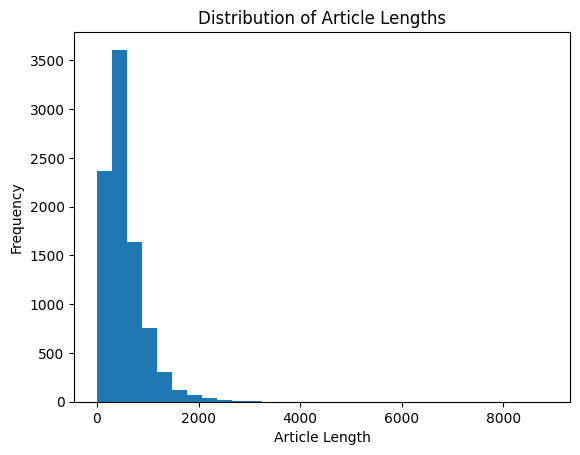

In [7]:
# Visualize article lengths (example using matplotlib)
import matplotlib.pyplot as plt

plt.hist(raw_data['Article'].apply(lambda x: len(str(x).split()) if pd.notna(x) else 0), bins=30)
plt.xlabel('Article Length')
plt.ylabel('Frequency')
plt.title('Distribution of Article Lengths')
plt.show()

In [8]:
# Define the phrases to be identified and removed
phrases = ["Sci-Five |", "Quiz |", "Daily Quiz |"]

# Create masks for rows starting with specified phrases or "\n"
title_mask = raw_data['Title'].str.startswith(tuple(phrases))
article_mask = raw_data['Article'].str.startswith("\n")

# Combine masks using logical OR
mask = title_mask | article_mask

# Filter out rows based on the combined mask
df = raw_data[~mask]

In [9]:
df.shape

(8467, 2)

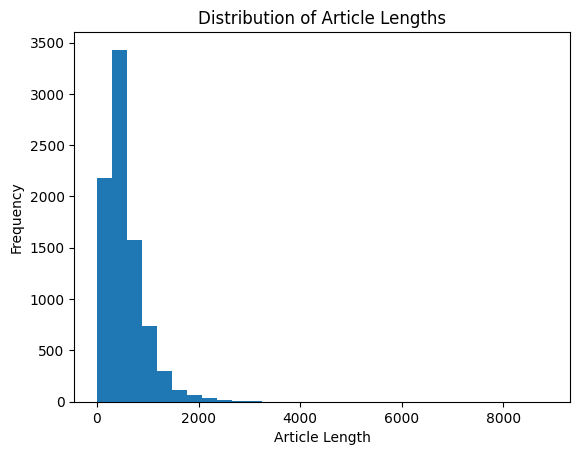

In [10]:
# Visualize article lengths (example using matplotlib)
import matplotlib.pyplot as plt

plt.hist(df['Article'].apply(lambda x: len(str(x).split()) if pd.notna(x) else 0), bins=30)
plt.xlabel('Article Length')
plt.ylabel('Frequency')
plt.title('Distribution of Article Lengths')
plt.show()

In [11]:
# Remove articles with length less than 300 characters
df = df[df['Article'].str.len() >= 300]

In [12]:
df.shape

(8439, 2)

In [13]:
df.head()

,Title,Article
0,Passenger vehicles wholesales rise 26.73% to r...,Domestic passenger vehicle wholesales grew 26....
1,Lamborghini unveils Urus S at starting price o...,"Automobili Lamborghini has unveiled Urus S, th..."
2,Rupee trade arrangement to help cut transactio...,International trade in the domestic currency w...
3,"G-20 Finance Ministers discuss debt distress, ...",G-20 countries discussed the debt distress of ...
4,"Goods exports grew 6% , imports 16.5% this fiscal",India’s goods exports declined for the second ...


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8439 entries, 0 to 8921
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Title    8439 non-null   object
 1   Article  8439 non-null   object
dtypes: object(2)
memory usage: 197.8+ KB


In [15]:
df.isnull().sum()

Title      0
Article    0
dtype: int64

In [16]:
def preprocessing(text):
    # Remove specific patterns from the text
    pattern1 = re.compile(r'\n\nCOMMents\n\n SHARE\n\n.*(?:\n.*)*')
    text = re.sub(pattern1, '', text)
    pattern2 = re.compile(r'\n\| Photo Credit:.*(?:\n.*)?')
    text = re.sub(pattern2, '', text)
    text = re.sub(r'\s+', ' ', text).strip()
    
    return text


# Apply the preprocess_text function to each example in the DataFrame
df['processed_article'] = df['Article'].apply(preprocessing)

In [17]:
df.head()

,Title,Article,processed_article
0,Passenger vehicles wholesales rise 26.73% to r...,Domestic passenger vehicle wholesales grew 26....,Domestic passenger vehicle wholesales grew 26....
1,Lamborghini unveils Urus S at starting price o...,"Automobili Lamborghini has unveiled Urus S, th...","Automobili Lamborghini has unveiled Urus S, th..."
2,Rupee trade arrangement to help cut transactio...,International trade in the domestic currency w...,International trade in the domestic currency w...
3,"G-20 Finance Ministers discuss debt distress, ...",G-20 countries discussed the debt distress of ...,G-20 countries discussed the debt distress of ...
4,"Goods exports grew 6% , imports 16.5% this fiscal",India’s goods exports declined for the second ...,India’s goods exports declined for the second ...


In [18]:
# Basic analysis of articles
num_articles = len(df)
avg_article_length = df['Article'].apply(lambda x: len(str(x).split()) if pd.notna(x) else 0).mean()
max_article_length = df['Article'].apply(lambda x: len(str(x).split()) if pd.notna(x) else 0).max()


In [19]:
print(f"Number of articles: {num_articles}")
print(f"Average article length: {avg_article_length:.2f} words")
print(f"Maximum article length: {max_article_length} words")

Number of articles: 8439
Average article length: 551.63 words
Maximum article length: 8879 words


In [20]:
title = df['Title'][5]
print(title)
print('*' * 100)
article = df['Article'][5]
print(article)
print('*' * 100)
processed_article = df['processed_article'][5]
print(processed_article)

Infosys Q4 profit slides 7% from December quarter, company misses revenue estimate
****************************************************************************************************
Infosys on Thursday said it recorded an 8% year-on-year increase in fourth-quarter net profit to ₹6,128 crore. Profit fell 7% compared with the preceding quarter. The company has estimated weak revenue growth of 4-7% for FY24, citing uncertain market conditions.
Revenue grew 16% to ₹37,441 crore in Q4 from a year earlier. but slid 2.3% compared with the December 2022 quarter. In dollar terms, revenue declined 3.2% to $4.55 billion, compared with the year-earlier period. Whole-year revenue in dollars increased 15.4% although the company had estimated 16-16.5% growth.
“Infosys delivered a surprisingly weak set of numbers for Q4 and missed street estimates on all multiple fronts on the back of unplanned project ramp-downs and cancellation across sectors,” said Sanjeev Hota, head of research, Sharekhan by BNP

In [21]:
import nltk
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

In [22]:
# Initialize stopwords and lemmatizer
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

In [23]:
def handle_numericals(text):
    # Handle currency symbols (₹, $, etc.)
    text = re.sub(r'₹\s?(\d+(?:,\d{3})*(?:\.\d+)?)', r'currency_\1', text)
    text = re.sub(r'\$\s?(\d+(?:,\d{3})*(?:\.\d+)?)', r'currency_\1', text)
    # Handle percentages (e.g., 7%)
    text = re.sub(r'(\d+(?:\.\d+)?)%', r'\1_percent', text)
    # Handle dates (e.g., Q4, FY24)
    text = re.sub(r'Q\d+', 'quarter', text)
    text = re.sub(r'FY\d+', 'fiscal_year', text)
    return text

In [24]:
df['processed_article'] = df['processed_article'].apply(handle_numericals)

In [25]:
df.head()

,Title,Article,processed_article
0,Passenger vehicles wholesales rise 26.73% to r...,Domestic passenger vehicle wholesales grew 26....,Domestic passenger vehicle wholesales grew 26....
1,Lamborghini unveils Urus S at starting price o...,"Automobili Lamborghini has unveiled Urus S, th...","Automobili Lamborghini has unveiled Urus S, th..."
2,Rupee trade arrangement to help cut transactio...,International trade in the domestic currency w...,International trade in the domestic currency w...
3,"G-20 Finance Ministers discuss debt distress, ...",G-20 countries discussed the debt distress of ...,G-20 countries discussed the debt distress of ...
4,"Goods exports grew 6% , imports 16.5% this fiscal",India’s goods exports declined for the second ...,India’s goods exports declined for the second ...


In [26]:
title = df['Title'][5]
print(title)
print('*' * 100)
article = df['Article'][5]
print(article)
print('*' * 100)
processed_article = df['processed_article'][5]
print(processed_article)

Infosys Q4 profit slides 7% from December quarter, company misses revenue estimate
****************************************************************************************************
Infosys on Thursday said it recorded an 8% year-on-year increase in fourth-quarter net profit to ₹6,128 crore. Profit fell 7% compared with the preceding quarter. The company has estimated weak revenue growth of 4-7% for FY24, citing uncertain market conditions.
Revenue grew 16% to ₹37,441 crore in Q4 from a year earlier. but slid 2.3% compared with the December 2022 quarter. In dollar terms, revenue declined 3.2% to $4.55 billion, compared with the year-earlier period. Whole-year revenue in dollars increased 15.4% although the company had estimated 16-16.5% growth.
“Infosys delivered a surprisingly weak set of numbers for Q4 and missed street estimates on all multiple fronts on the back of unplanned project ramp-downs and cancellation across sectors,” said Sanjeev Hota, head of research, Sharekhan by BNP

In [27]:
from transformers import PegasusForConditionalGeneration, PegasusTokenizer
from torch.utils.data import Dataset, DataLoader

In [28]:
# Load pre-trained Pegasus model and tokenizer
model_name = 'google/pegasus-newsroom'
tokenizer = PegasusTokenizer.from_pretrained(model_name)
model = PegasusForConditionalGeneration.from_pretrained(model_name)

In [29]:
# Step 2: Preprocess Articles for Model Input
class ArticleDataset(Dataset):
    def __init__(self, tokenizer, articles):
        self.tokenizer = tokenizer
        self.articles = articles
    
    def __len__(self):
        return len(self.articles)
    
    def __getitem__(self, idx):
        encoded = self.tokenizer(self.articles[idx], return_tensors='pt', truncation=True, padding='max_length', max_length=512)
        return encoded

# Main script
if __name__ == "__main__":
    # Step 1: Load and Preprocess Raw Data
    processed_data = pd.read_csv("/home/prashanth/DS/NLP/article-generator/data/processed/processed_articles.csv")

    # Step 2: Preprocess Articles for Model Input
    tokenizer = PegasusTokenizer.from_pretrained("google/pegasus-xsum")
    dataset = ArticleDataset(tokenizer, processed_data['processed_article'])
    dataloader = DataLoader(dataset, batch_size=1, shuffle=False)

In [30]:
# Step 3: Generate Summaries
model = PegasusForConditionalGeneration.from_pretrained("google/pegasus-xsum")

generated_summaries = []
for batch in dataloader:
    inputs = batch  # Each batch is a dictionary-like object returned by DataLoader
    input_ids = inputs['input_ids'].squeeze(0)  # Squeeze to remove batch dimension
    attention_mask = inputs['attention_mask'].squeeze(0)  # Squeeze to remove batch dimension
    
    generated_ids = model.generate(input_ids, attention_mask=attention_mask, max_length=150, num_beams=4, length_penalty=2.0)
    generated_texts = tokenizer.batch_decode(generated_ids, skip_special_tokens=True)
    generated_summaries.append(" ".join(generated_texts))

# Add generated summaries to the DataFrame
processed_data['Generated_Summary'] = generated_summaries

# Save DataFrame to CSV
processed_data.to_csv("/home/prashanth/DS/NLP/article-generator/data/processed/processed_data_with_summaries.csv", index=False)

: 

: 

In [ ]:
processed_data.head()

In [ ]:
processed_data.shape